In [1]:
#importing necessary packages
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt

In [7]:
from wordcloud import WordCloud
from PIL import Image
import os
import numpy as np
from os import path

#Perfoming Sentiment Analysis for the review titles of samsung and oneplus

Approach
1. Get the reviewer data of both the mobiles
2. Fetch the Sentiments using Textblob's Sentiment function
3. Create wordclouds for both positve polarity and negative polarity reviews
4. Check the buzz words in the word cloud and perform exploratory analysis


##Galaxy S8

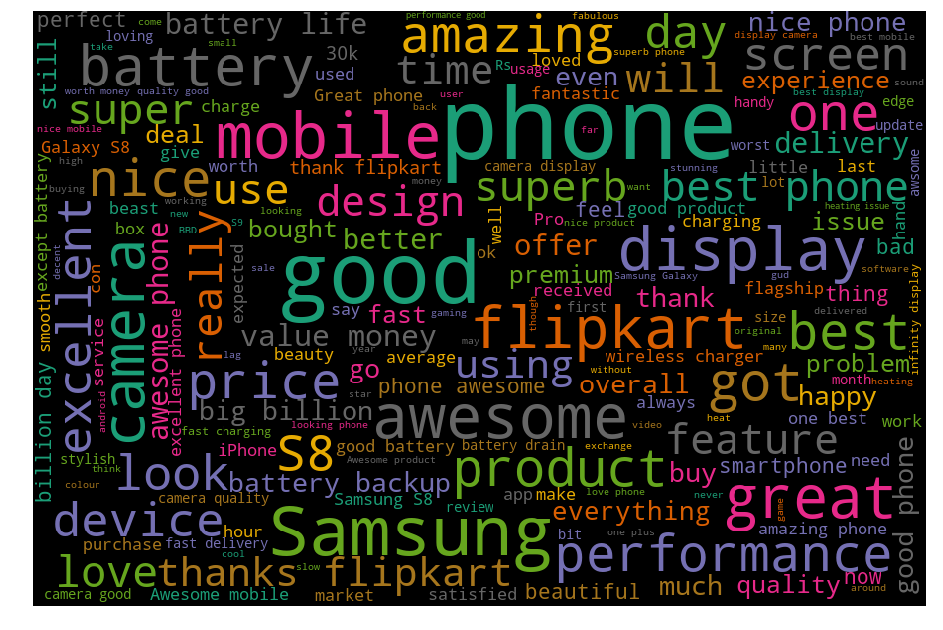

In [11]:
#reading the csv file
df=pd.read_csv('E:/ONEPLUS vs SAMSUNG/Flipkart_Samsung_Galaxy_s8_reviews_3500.csv')

## A function which uses textblob to process the review content and returns the sentiment as positive if polarity is greater
# than zero else returns negative
def sentiment_textblob(rev):
    analyze = TextBlob(rev)
    return 'positive' if analyze.sentiment.polarity >= 0 else 'negative'

# defining a function to generate word cloud with of desired height, width, size and color
def WC(words):
    cloud = WordCloud(background_color="black",width=900, height=600, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(words)
    plt.figure(figsize=(16, 13))
    plt.imshow(cloud)
    plt.axis('off')

# calling the textblob function and applying it to the review text at row level using lambda function
sentiments = df.Review_Title.apply(lambda review: sentiment_textblob(review))

#Counting the number of positive and number of negative polarities in the reviews, using count function
#pd.DataFrame(sentiments.value_counts())

#Append the Sentiment column to the dataframe
df['sentiment_polarity'] = sentiments


#displaying the most frequently occuring words from the review title rows which have positive polarity- Samsung Galaxy S8
pos = ' '.join([text for text in df['Review_Text'][df.sentiment_polarity == 'positive']])
#calling wordcloud function
WC(pos)

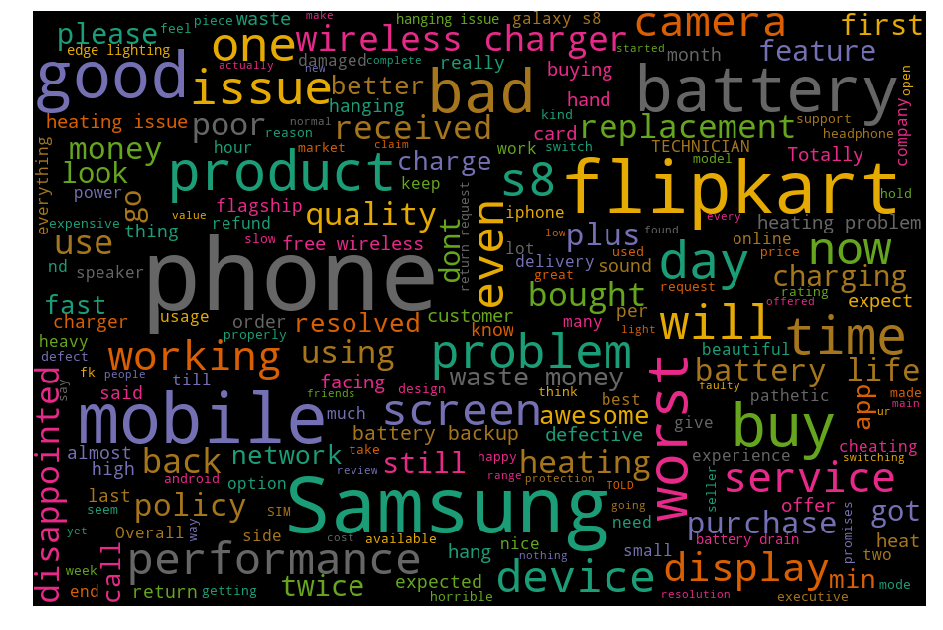

In [12]:
pos = ' '.join([text for text in df['Review_Text'][df.sentiment_polarity == 'negative']])
#calling wordcloud function
WC(pos)

##OnePlus 6T

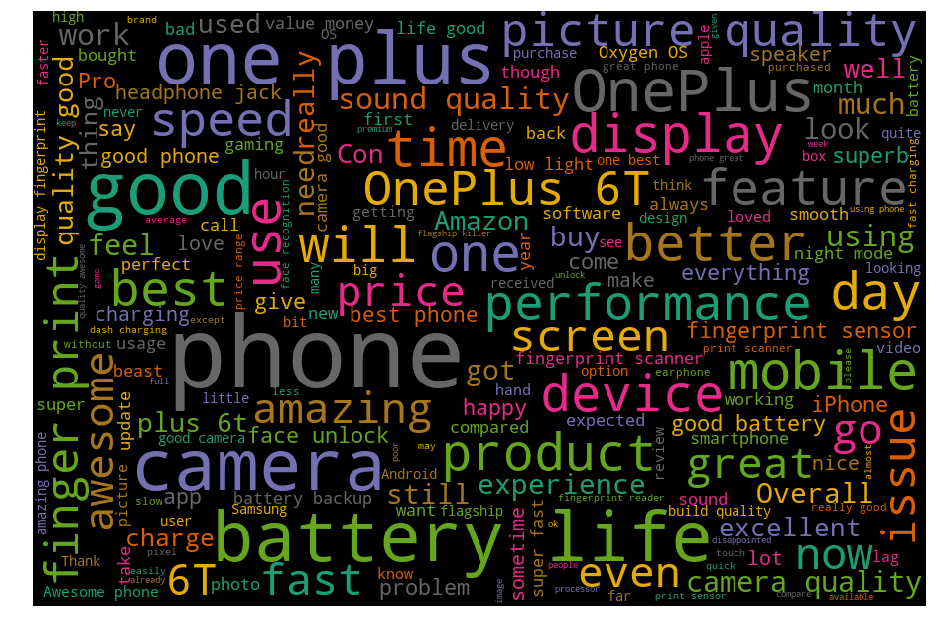

In [13]:
#oneplus 6T tags sentiment analysis
df1=pd.read_csv('E:/ONEPLUS vs SAMSUNG/OnePlus_6T_review_scraping_5000.csv')

#Function call - sentiment analysis
sentiments_oneplus = df1.Review_Title.apply(lambda review: sentiment_textblob(review))
#pd.DataFrame(sentiments.value_counts())
df1['sentiment_polarity'] = sentiments_oneplus

#displaying the most frequently occuring words from the review title rows which have positive polarity- onePlus 6T
pos = ' '.join([text for text in df1['Review_Text'][df1.sentiment_polarity == 'positive']])
#calling wordcloud function
WC(pos)

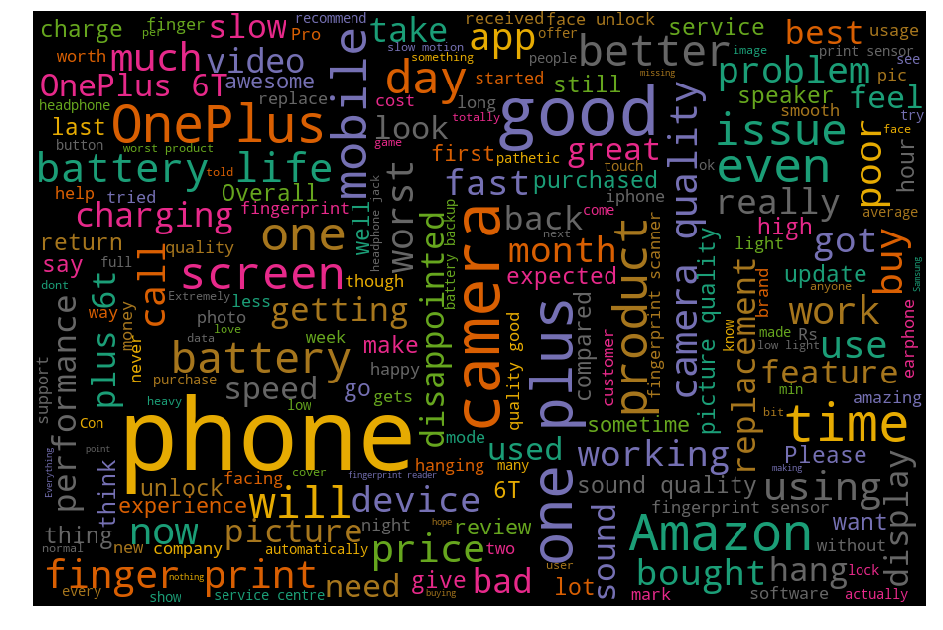

In [14]:
pos = ' '.join([text for text in df1['Review_Text'][df1.sentiment_polarity == 'negative']])
#calling wordcloud function
WC(pos)